# Preprocessing

In [100]:
import pandas as pd
import missingno as msno
import numpy as np

In [101]:
dataset = pd.read_csv('datakesehatanibu.csv')
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [102]:
print(dataset.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [103]:
dataset.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [104]:
pd.unique(dataset['RiskLevel'])

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [105]:
x = dataset.iloc[:,:6].values
y = dataset.iloc[:,-1].values

In [106]:
y

array(['high risk', 'high risk', 'high risk', ..., 'high risk',
       'high risk', 'mid risk'], shape=(1014,), dtype=object)

In [107]:
# ordinal encodeng (atribute yang memiliki level rank)
from sklearn.preprocessing import OrdinalEncoder

y_ordinal = dataset[['RiskLevel']] 


In [108]:
oren = OrdinalEncoder(categories=[['low risk', 'mid risk', 'high risk']])  # urutan sesuai ranking

In [109]:
y_encoded = oren.fit_transform(y_ordinal)
y_encoded

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [1.]], shape=(1014, 1))

In [ ]:
dataset['RiskLevel'] = y_encoded

0       2.0
1       2.0
2       2.0
3       2.0
4       0.0
       ... 
1009    2.0
1010    2.0
1011    2.0
1012    2.0
1013    1.0
Name: RiskLevel, Length: 1014, dtype: float64

In [111]:
print(dataset.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel      float64
dtype: object


In [112]:
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2.0
1,35,140,90,13.0,98.0,70,2.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,2.0
4,35,120,60,6.1,98.0,76,0.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2.0
1010,55,120,90,18.0,98.0,60,2.0
1011,35,85,60,19.0,98.0,86,2.0
1012,43,120,90,18.0,98.0,70,2.0


# Split train test

In [113]:
# split dataset training dan testing (pembentukan model dan validasi)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=18)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training / Fit Model

In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train_scaled, y_train)
model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Prediksi /  Test

In [116]:
y_pred = model.predict(x_test_scaled)
y_pred

array(['high risk', 'mid risk', 'low risk', 'low risk', 'low risk',
       'mid risk', 'low risk', 'mid risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'mid risk', 'mid risk', 'high risk',
       'mid risk', 'low risk', 'mid risk', 'low risk', 'mid risk',
       'mid risk', 'mid risk', 'mid risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'high risk', 'mid risk', 'mid risk', 'low risk',
       'mid risk', 'high risk', 'low risk', 'high risk', 'high risk',
       'mid risk', 'low risk', 'mid risk', 'mid risk', 'high risk',
       'mid risk', 'mid risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'mid risk', 'low risk', 'low risk', 'mid risk',
       'mid risk', 'high risk', 'low risk', 'high risk', 'mid risk',
       'low risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'mid risk', 'low risk', 'high risk',
       'high risk', 'mid risk', 'low risk', 'mid

# Cek Akurasi dan Evaluasi

In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.8522167487684729

Classification Report:
               precision    recall  f1-score   support

   high risk       0.90      0.89      0.89       106
    low risk       0.92      0.82      0.87       174
    mid risk       0.75      0.87      0.81       126

    accuracy                           0.85       406
   macro avg       0.86      0.86      0.85       406
weighted avg       0.86      0.85      0.85       406


Confusion Matrix:
 [[ 94   2  10]
 [  5 142  27]
 [  6  10 110]]


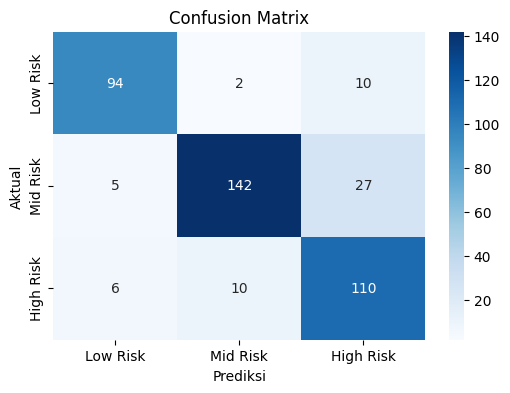

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Klasifikasi Data Baru

In [119]:
new_data = [[28, 110, 70, 4.5, 98.6, 80]] #memasukkan data baru
new_predik = model.predict(new_data)
print(new_predik)

['high risk']


# Menyimpan Model

In [120]:
import joblib

# Simpan model
joblib.dump(model, 'model_risk.pkl')

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

# Simpan encoder
joblib.dump(y_encoded, 'ordinal_encoder.pkl')

['ordinal_encoder.pkl']